In [1]:
import bt
import matplotlib
import matplotlib.pyplot as plt
import talib
import pandas as pd
matplotlib.use('TKAgg', force=True)
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

In [2]:
tickers = 'yndx, nilsy, novky, ojscy, opygy'

In [3]:
ticker = 'yndx'

# Стратегия еженедельной ребалансировки

In [4]:
def trade_weekly(ticker, name, start='2019-04-1', end='2021-04-1'):
    # Получаем данные
    price_data = bt.get(ticker, start=start, end=end)
    # Определяем trade_weekly стратегию
    bt_strategy = bt.Strategy(name,
                        [bt.algos.RunWeekly(), 
                        bt.algos.SelectAll(), 
                        bt.algos.WeighEqually(),
                        bt.algos.Rebalance()]) 
    # Возвращаем backtest
    return bt.Backtest(bt_strategy, price_data)

In [5]:
def buy_and_hold(ticker, name, start='2019-04-1', end='2021-04-1'):
    # Получаем данные
    price_data = bt.get(ticker, start=start, end=end)
    # Определяем benchmark стратегию
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.RunOnce(),
                               bt.algos.SelectAll(),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Возвращаем backtest
    return bt.Backtest(bt_strategy, price_data)

In [6]:
trade_weekly = trade_weekly(tickers, name='Trade_Weekly')

In [7]:
benchmark = buy_and_hold(tickers, name='benchmark')
benchmark1 = buy_and_hold(ticker, name='benchmark')

C:\Users\Григорий\AppData\Roaming\Python\Python39\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)
C:\Users\Григорий\AppData\Roaming\Python\Python39\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in divide
  res = np.divide(er.mean(), std)


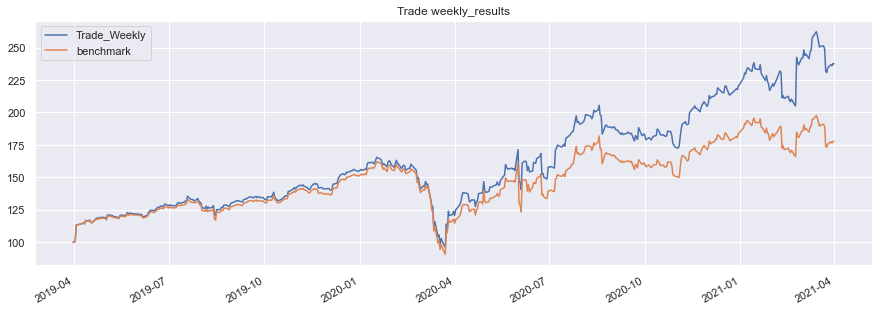

In [8]:
trade_weekly_results = bt.run(trade_weekly, benchmark)
trade_weekly_results.plot(title='Trade weekly_results')
plt.show()

In [9]:
trade_weekly_results.get_transactions()

price  quantity
Date       Security                      
2019-04-01 nilsy      16.136810   12394.0
           novky     157.763519    1267.0
           ojscy       3.224265   62029.0
           opygy      38.540642    5189.0
           yndx       33.970001    5887.0
...                         ...       ...
2021-03-29 nilsy      27.412607   -1029.0
           novky     189.982437    -192.0
           ojscy       5.786618   12545.0
           opygy      88.522560     101.0
           yndx       63.740002    -264.0

[530 rows x 2 columns]

In [10]:
lookback_returns_trade_weekly = trade_weekly_results.display_lookback_returns()
lookback_returns_trade_weekly

,Trade_Weekly,benchmark
mtd,-0.11%,-0.00%
3m,7.31%,-3.76%
6m,30.04%,10.95%
ytd,7.31%,-3.76%
1y,97.05%,55.27%
3y,53.96%,33.23%
5y,nan%,nan%
10y,nan%,nan%
incep,53.96%,33.23%


Нужно обязательно рассчитать прибыль вместе с комиссией брокера

In [11]:
# Получим всю backtest статистику
trade_weekly_info = trade_weekly_results.stats

# Получаем ежедневную, ежемесячную и ежегоднюю прибыль
print('Daily return: %.4f'% trade_weekly_info.loc['daily_mean']['Trade_Weekly'])
print('Monthly return: %.4f'% trade_weekly_info.loc['monthly_mean']['Trade_Weekly'])
print('Yearly return: %.4f'% trade_weekly_info.loc['yearly_mean']['Trade_Weekly'])
# Получаем среднуюю просадку
print('Average drawdown: %.2f'% trade_weekly_info.loc['avg_drawdown']['Trade_Weekly'])
# Получаем среднее дней просадки
print('Average drawdown days: %.0f'% trade_weekly_info.loc['avg_drawdown_days']['Trade_Weekly'])
# Получеем CAGR
print('Compound annual growth rate: %.4f'% trade_weekly_info.loc['cagr']['Trade_Weekly'])
# Получаем максимальную просадку
print('Maximum drawdown: %.2f'% trade_weekly_info.loc['max_drawdown']['Trade_Weekly'])
# Получаем Calmar ratio
print('Calmar Ratio: %.2f'% trade_weekly_info.loc['calmar']['Trade_Weekly'])
# Получаем годовая доходность и волатильность
print('Annual return: %.2f'% trade_weekly_info.loc['yearly_mean']['Trade_Weekly'])
print('Annual volatility: %.2f'% trade_weekly_info.loc['yearly_vol']['Trade_Weekly'])
# Получаем Sharpe ratio
print('Sharpe ratio %.2f'% trade_weekly_info.loc['yearly_sharpe']['Trade_Weekly'])
# Получаем годовой Sortino ratio
print('Annual Sortino ratio: %.2f'% trade_weekly_info.loc['yearly_sortino']['Trade_Weekly'])
# Получаем месячный Sortino ratio
print('Monthly Sortino ratio %.2f'% trade_weekly_info.loc['monthly_sortino']['Trade_Weekly'])

Daily return: 0.5141
Monthly return: 0.4616
Yearly return: 0.2514
Average drawdown: -0.04
Average drawdown days: 13
Compound annual growth rate: 0.5396
Maximum drawdown: -0.42
Calmar Ratio: 1.29
Annual return: 0.25
Annual volatility: 0.25
Sharpe ratio 1.00
Annual Sortino ratio: inf
Monthly Sortino ratio 3.93


# Сигнальная стратегия (SMA)

In [12]:
def signal_strategy(ticker, period, name, start='2019-04-1', end='2021-04-1'):
    # Получаем данные и считаем SMA
    price_data = bt.get(ticker, start=start, end=end)
    sma = price_data.rolling(period).mean()
    # Определяем сигнальную стратегию
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.SelectWhere(price_data>sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Возвращаем backtest
    return bt.Backtest(bt_strategy, price_data)

In [13]:
sma10 = signal_strategy(ticker, period = 10, name='SMA10')
sma30 = signal_strategy(ticker, period = 30, name='SMA30')
sma50 = signal_strategy(ticker, period = 50, name='SMA50')

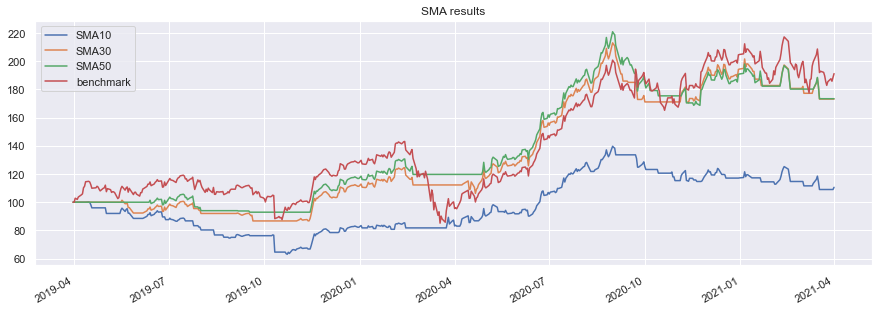

In [14]:
SMA_results = bt.run(sma10, sma30, sma50, benchmark1)
SMA_results.plot(title='SMA results')
plt.show()

# Сигнальная стратегия (EMA)

In [15]:
def signal_strategy_EMA(ticker, period, name, start='2019-04-1', end='2021-04-1'):
    # Получаем данные и считаем EMA
    price_data = bt.get(ticker, start=start, end=end)
    ema[ticker] = talib.EMA(price_data[ticker], timeperiod=period)
    # Определяем стратегию
    bt_strategy = bt.Strategy(name,
                          [bt.algos.SelectWhere(price_data > ema),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    # Возвращаем backtest
    return bt.Backtest(bt_strategy, price_data)

In [16]:
ema12 = signal_strategy(ticker, period = 12, name='EMA12')
ema26 = signal_strategy(ticker, period = 26, name='EMA26')

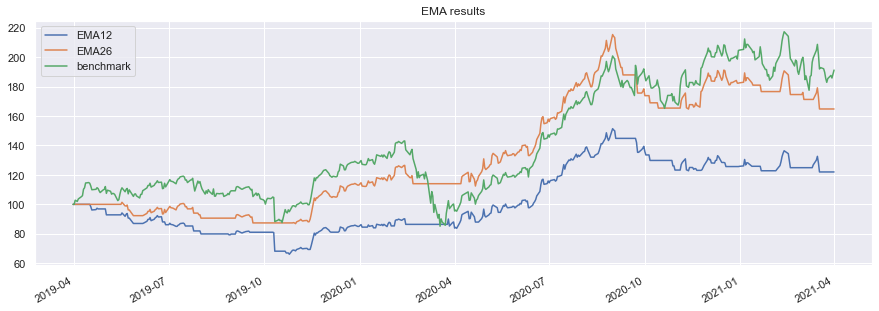

In [17]:
EMA_results = bt.run(ema12, ema26, benchmark1)
EMA_results.plot(title='EMA results')
plt.show()

# Стратегия следования за трендом

In [18]:
def trend_following (ticker, name, start='2019-04-1', end='2021-04-1'):
    # Получаем данные и считаем EMA_short (интервал = 10) и EMA_long (интервал = 40) 
    price_data = bt.get(ticker, start=start, end=end)
    EMA_short = talib.EMA(price_data[ticker], timeperiod = 10)
    EMA_long = talib.EMA(price_data[ticker], timeperiod = 40)
    # Создаем датафрейм signal
    signal = EMA_long.copy()
    signal[EMA_long.isnull()] = 0
    # Строим сигнал
    signal[EMA_short > EMA_long] = 1
    signal[EMA_short < EMA_long] = -1
    signal = pd.DataFrame(signal)
    signal.columns = [ticker]
    # Определяем стратегию
    bt_strategy = bt.Strategy(name, 
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])
    # Возвращаем backtest
    return bt.Backtest(bt_strategy, price_data)

In [19]:
trend_following = trend_following(ticker, name='trend_following')

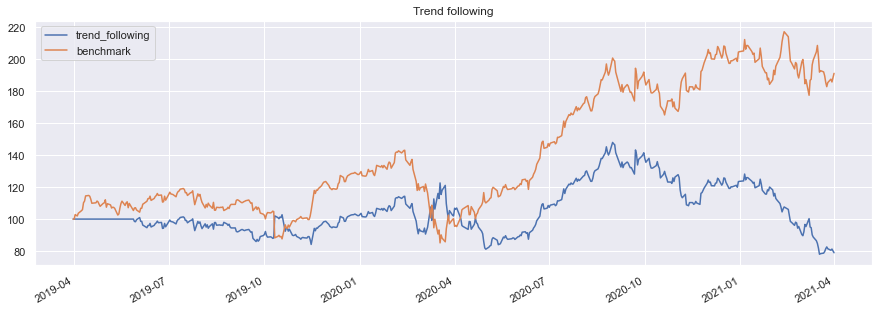

In [20]:
trend_following_results = bt.run(trend_following, benchmark1)
trend_following_results.plot(title='Trend following')
plt.show()

# Стратегия возврата к среднему

In [21]:
def mean_reversion (ticker, name, start='2019-04-1', end='2021-04-1'):
    # Получаем данные и считаем RSI
    price_data = bt.get(ticker, start=start, end=end)
    stock_rsi = talib.RSI(price_data[ticker]).to_frame()
    # Создаем копию датафрейм RSI
    signal = stock_rsi.copy()
    signal[stock_rsi.isnull()] = 0
    # Строим сигнал
    signal[stock_rsi > 70] = -1
    signal[stock_rsi < 30] = 1
    signal[(stock_rsi <= 70) & (stock_rsi >= 30)] = 0
    signal = pd.DataFrame(signal)
    signal.columns = [ticker]
    # Определяем стратегию
    bt_strategy = bt.Strategy(name, 
                          [bt.algos.WeighTarget(signal),
                           bt.algos.Rebalance()])
    # Возвращаем backtest
    return bt.Backtest(bt_strategy, price_data)

In [22]:
mean_reversion = mean_reversion(ticker, name='mean_reversion')

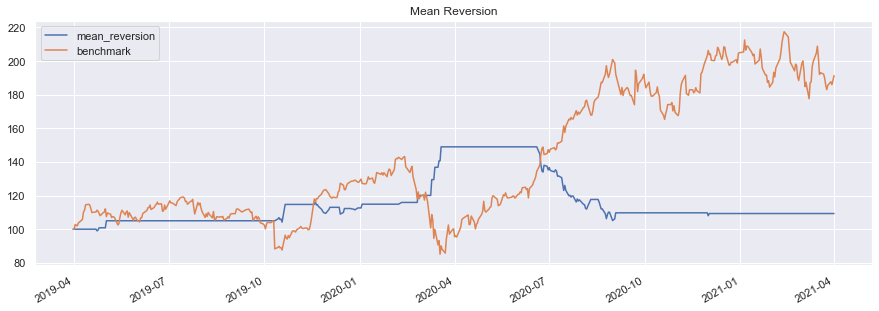

In [23]:
mean_reversion_results = bt.run(mean_reversion, benchmark1)
mean_reversion_results.plot(title='Mean Reversion')
plt.show()

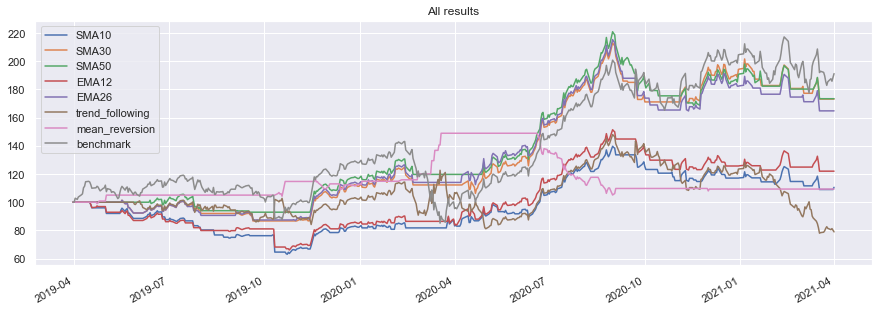

In [24]:
All_results = bt.run(sma10, sma30, sma50, ema12, ema26, trend_following, mean_reversion, benchmark1)
All_results.plot(title='All results')
plt.show()

# Volatility indicator: Bollinger Bands

In [25]:
def bollinger_bands (ticker, timeperiod = 20, nbdevup = 2, nbdevdn = 2, start='2019-04-1', end='2021-04-1'):
    # Получаем данные и считаем верхние и нижние Bollinger Bands
    price_data = bt.get(ticker, start=start, end=end)
    upper_2sd, mid_2sd, lower_2sd = talib.BBANDS(price_data[ticker],
                                     nbdevup = nbdevup,
                                     nbdevdn = nbdevdn,
                                     timeperiod = timeperiod)
    # Визуализируем верхние и нижние Bollinger Bands 
    plt.plot(price_data[ticker], color='green', label='Price')
    plt.plot(upper_2sd, color='orange', label='Upper 2sd')
    plt.plot(lower_2sd, color='orange', label='Lower 2sd')
    # Customize and show the plot
    plt.legend(loc='upper left')
    plt.title('Bollinger Bands (2sd)')
    return plt.show()

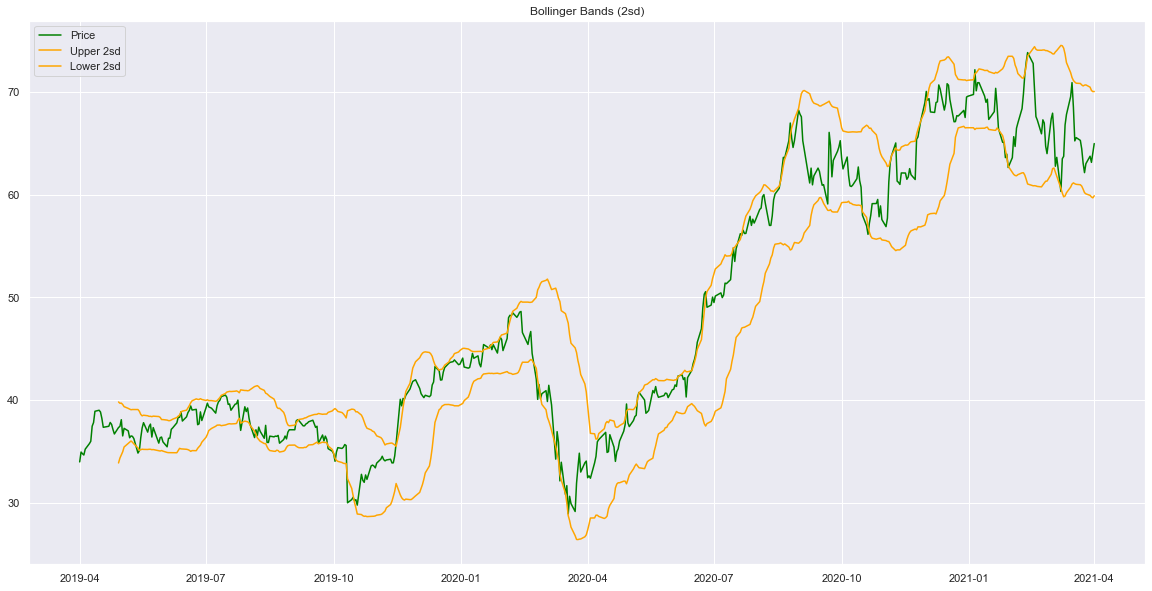

In [26]:
bollinger_bands(ticker)